In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
features_3did_df = pd.read_pickle('/Users/darylwilding-mcbride/Downloads/experiments/P3856/features-3did/experiment-features.pkl')
features_pasef_df = pd.read_pickle('/Users/darylwilding-mcbride/Downloads/experiments/P3856/features/P3856_YHE211_1-features.pkl')
features_pasef_df = features_pasef_df[(features_pasef_df.rt_apex >= 1650) & (features_pasef_df.rt_apex <= 2200)]

In [24]:
print('there are {} 3DID features before the de-dup step, {} from PASEF'.format(len(features_3did_df), len(features_pasef_df)))

there are 24400 3DID features before the de-dup step, 168681 from PASEF


In [25]:
features_pasef_df.columns

Index(['feature_id', 'charge', 'rt_apex', 'rt_peak_width', 'scan_apex',
       'scan_peak_width', 'intensity', 'precursor_id', 'monoisotopic_mass',
       'predicted_mass_error', 'recalibrated_monoisotopic_mass',
       'recalibrated_monoisotopic_mz', 'percolator_idx'],
      dtype='object')

In [26]:
features_pasef_df['intensity_log'] = np.log10(features_pasef_df.intensity)
features_pasef_df['method'] = 'pasef'
features_3did_df['intensity_log'] = np.log10(features_3did_df.intensity)
features_3did_df['method'] = '3did'

In [27]:
intensities_l = [features_pasef_df,features_3did_df]
intensities_df = pd.concat(intensities_l, sort=False)

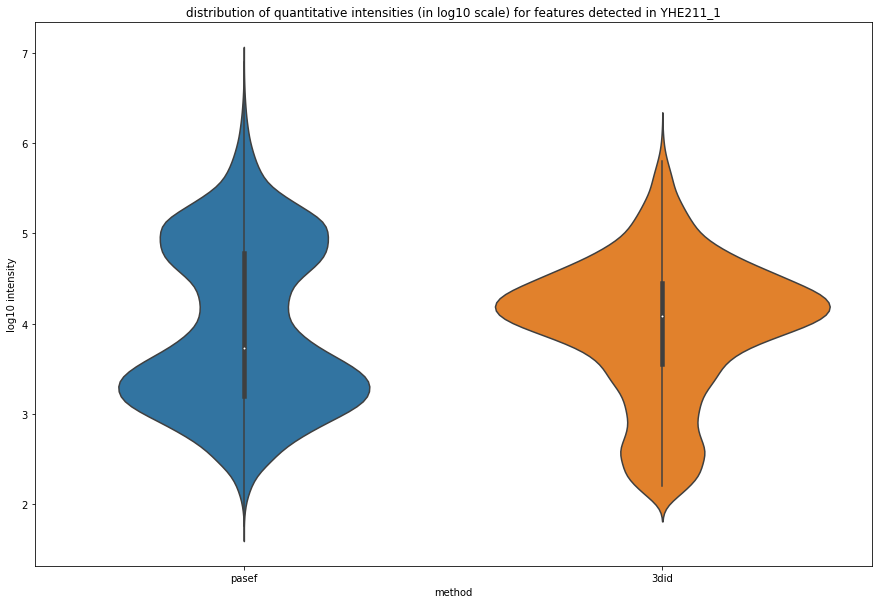

In [28]:
plt.figure(figsize=(15,10))
ax = sns.violinplot(x=intensities_df.method, y=intensities_df.intensity_log)
_ = plt.ylabel("log10 intensity")
_ = plt.title('distribution of quantitative intensities (in log10 scale) for features detected in YHE211_1')